In [27]:
import pandas as pd
df = pd.read_csv('CC GENERAL.csv')
#filling missing values using mean
new_df=df.fillna(df.mean(numeric_only=True))
new_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
x = new_df.iloc[:,1:17].values
# Applying min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(x)
print(scaled)
#Applying Standard scaler and reducing size to k=2 using PCA
scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca,columns = ['PC1', 'PC2'])
final_df= pd.concat([df2,new_df[['TENURE']]],axis=1)
final_df.head()

[[2.14779454e-03 8.18182000e-01 1.94536779e-03 ... 3.97863135e-03
  1.82564563e-03 0.00000000e+00]
 [1.68169097e-01 9.09091000e-01 0.00000000e+00 ... 8.08933873e-02
  1.40344791e-02 2.22222000e-01]
 [1.31026136e-01 1.00000000e+00 1.57662475e-02 ... 1.22643641e-02
  8.20961806e-03 0.00000000e+00]
 ...
 [1.22871936e-03 8.33333000e-01 2.94456089e-03 ... 1.60229492e-03
  1.07843629e-03 2.50000000e-01]
 [7.06688341e-04 8.33333000e-01 0.00000000e+00 ... 1.03604933e-03
  7.29475795e-04 2.50000000e-01]
 [1.95717777e-02 6.66667000e-01 2.22932216e-02 ... 1.24533826e-03
  1.15527021e-03 0.00000000e+00]]


,PC1,PC2,TENURE
0,-1.718893,-1.072938,12
1,-1.169312,2.509333,12
2,0.938415,-0.382601,12
3,-0.907505,0.045865,12
4,-1.637829,-0.684976,12


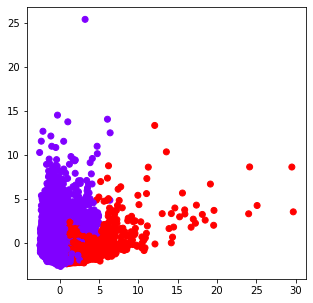

In [47]:
#Applying AgglomerativeClustering for cluster size =2
from sklearn.cluster import AgglomerativeClustering
cluster2 = AgglomerativeClustering(n_clusters = 2)
# plotting the cluster data
plt.figure(figsize =(5, 5))
plt.scatter(final_df['PC1'], final_df['PC2'],c = cluster2.fit_predict(final_df), cmap ='rainbow')
plt.show()

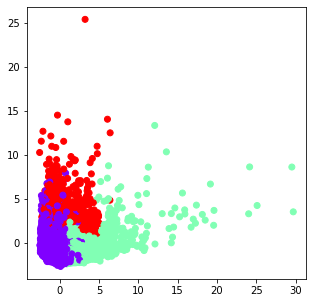

In [48]:
#Applying AgglomerativeClustering for cluster size =3
from sklearn.cluster import AgglomerativeClustering
cluster3 = AgglomerativeClustering(n_clusters = 3)
# plotting the cluster data
plt.figure(figsize =(5, 5))
plt.scatter(final_df['PC1'], final_df['PC2'],c = cluster3.fit_predict(final_df), cmap ='rainbow')
plt.show()

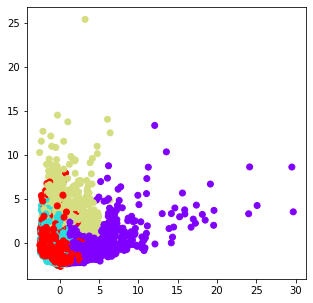

In [49]:
#Applying AgglomerativeClustering for cluster size = 4
from sklearn.cluster import AgglomerativeClustering
cluster4 = AgglomerativeClustering(n_clusters = 4)
# plotting the cluster data
plt.figure(figsize =(5, 5))
plt.scatter(final_df['PC1'], final_df['PC2'],c = cluster4.fit_predict(final_df), cmap ='rainbow')
plt.show()

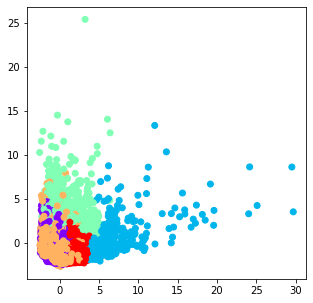

In [50]:
#Applying AgglomerativeClustering for cluster size =5
from sklearn.cluster import AgglomerativeClustering
cluster5 = AgglomerativeClustering(n_clusters = 5)
# plotting the cluster data
plt.figure(figsize =(5, 5))
plt.scatter(final_df['PC1'], final_df['PC2'],c = cluster5.fit_predict(final_df), cmap ='rainbow')
plt.show()

In [53]:
#Calculating silhouette scores 
from sklearn.metrics import silhouette_score
k_value = [2,3,4,5]
score = []
score.append(silhouette_score(final_df,cluster2.fit_predict(final_df)))
score.append(silhouette_score(final_df,cluster3.fit_predict(final_df)))
score.append(silhouette_score(final_df,cluster4.fit_predict(final_df)))
score.append(silhouette_score(final_df,cluster5.fit_predict(final_df)))
score

[0.30617244539265465,
 0.3279780947703489,
 0.37899786371084043,
 0.3285890562420389]

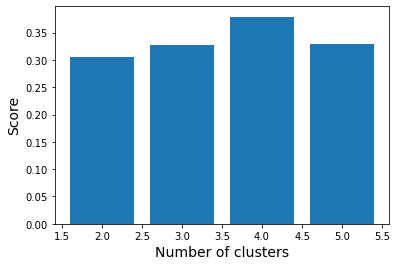

In [56]:
#plotting graph
plt.bar(k_value, score)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()